In [1]:
%pip install torch numpy matplotlib pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1 and add a channel dimension
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [3]:
def create_uonet_autoencoder_no_skip(input_shape=(28, 28, 1)):
    inputs = Input(shape=input_shape)

    # Encoder
    e1 = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2, 2), padding='same')(e1) # Output: 14x14x32

    e2 = Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2, 2), padding='same')(e2) # Output: 7x7x64

    # Bottleneck
    b = Conv2D(128, (3, 3), activation='relu', padding='same')(p2)

    # Decoder
    d1 = Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same')(b) # Output: 14x14x64
    d2 = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(d1) # Output: 28x28x32

    # Output Layer
    outputs = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d2)

    model = Model(inputs, outputs)
    return model

autoencoder = create_uonet_autoencoder_no_skip()
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 14, 14, 64)     │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │        18,464 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,217 (723.50 KB)

 Trainable params: 185,217 (723.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - loss: 0.2084 - val_loss: 0.0710
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0703 - val_loss: 0.0677
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0677 - val_loss: 0.0662
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0665 - val_loss: 0.0655
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0657 - val_loss: 0.0649
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0651 - val_loss: 0.0642
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0645 - val_loss: 0.0639
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0643 - val_loss: 0.0636
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - loss: 0.0639 - val_loss: 0.0632
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0636 - val_loss: 0.0629
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0632 - val_loss: 0.0627
Epoch 12/20
469/469 ━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


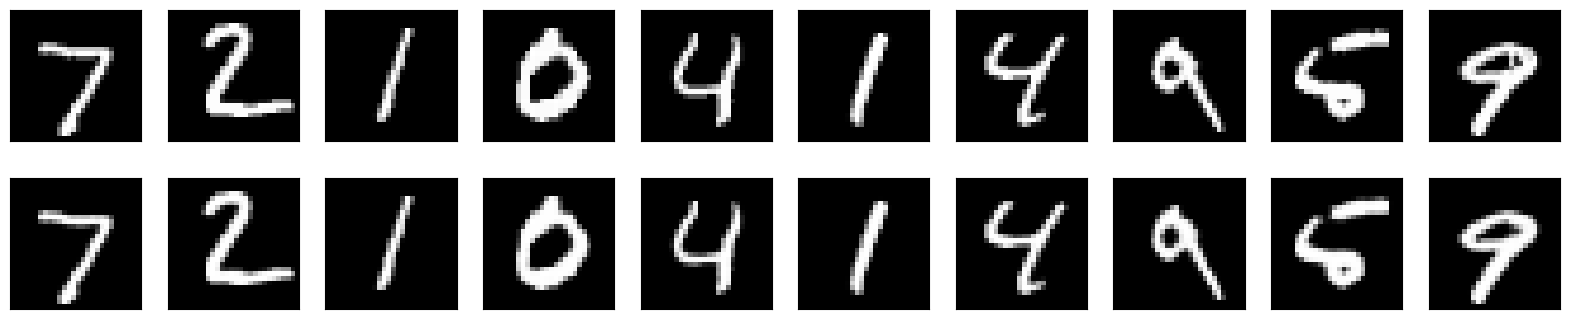

In [7]:
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()